## --> To load the saved model and run it on the test data, run the cells marked with #+

In [2]:
#+
import pandas as pd
import numpy as np
import gensim
import gensim.downloader
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn import metrics, datasets, feature_selection, feature_extraction, model_selection, naive_bayes, pipeline, manifold, preprocessing

import nltk
nltk.download('stopwords')
nltk.download('wordnet')

import setUpFunctions
import evaluation

[nltk_data] Downloading package stopwords to /home/esther/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/esther/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
#+ uncomment the wanted options

vectorizerType = 1 # Count Vectorizer
# vectorizerType = 2 # Tf-Idf Vectorizer

language = 'en' 
# language = 'es'

# Setting up Vectorizer and Vocabulary

In [ ]:
#initializing vectorizer
if(vectorizerType == 1):
    vectorizer = feature_extraction.text.CountVectorizer(max_features=10000, ngram_range=(1,1))
elif(vectorizerType == 2):
    vectorizer = feature_extraction.text.TfidfVectorizer(max_features=10000, ngram_range=(1,1))

In [ ]:
#retrieving train tweets and generating vocabulary
train_tweets = setUpFunctions.getTrainTweets(language)

corpus = train_tweets["tweet_clean"]
vectorizer.fit(corpus)
X_train = vectorizer.transform(corpus)
dic_vocabulary = vectorizer.vocabulary_

# Feature Selection using Chi-Square Test

In [ ]:
emoji = train_tweets["emoji"]
X_names = vectorizer.get_feature_names()
p_value_limit = 0.95
dtf_features = pd.DataFrame()

#performing chi-square test for feature selection
for cat in np.unique(emoji):
    chi2, p = feature_selection.chi2(X_train, emoji==cat)
    dtf_features = dtf_features.append(pd.DataFrame({"feature":X_names, "score":1-p, "emoji":cat}))
    dtf_features = dtf_features.sort_values(["emoji","score"], ascending=[True,False])
    dtf_features = dtf_features[dtf_features["score"] > p_value_limit]
    
X_names = dtf_features["feature"].unique().tolist()

In [ ]:
#displaying top selected features for each emoji
for cat in np.unique(emoji):
    print("# {}:".format(cat))
    print("  . selected features:", len(dtf_features[dtf_features["emoji"]==cat]))
    print("  . top features:", ",".join(dtf_features[dtf_features["emoji"]==cat]["feature"].values[:10]))
    print(" ")

# 0:
  . selected features: 3215
  . top features: adore,aint,always,amazing,america,amor,amp,anniversary,as,baby
 
# 1:
  . selected features: 2473
  . top features: absolutely,adorable,always,amazing,babe,baby,bacon,bae,bakery,balayage
 
# 10:
  . selected features: 1618
  . top features: 35mm,analog,angeles,art,best,birthday,blackandwhite,blog,bmx,brooklyn
 
# 11:
  . selected features: 1780
  . top features: 2016,2016election,4th,4thofjuly,4thofjulyweekend,86th,911,911memorial,abe,abraham
 
# 12:
  . selected features: 1648
  . top features: 30a,70,75,advantage,afternoon,aransas,baby,bahamas,bay,beach
 
# 13:
  . selected features: 1026
  . top features: alzheimers,amethyst,aura,awareness,bernard,best,bieber,bill,birthday,cancer
 
# 14:
  . selected features: 1346
  . top features: bad,christmas,come,dont,drink,get,good,guess,hey,hint
 
# 15:
  . selected features: 1571
  . top features: 100,92,a1,aint,always,appreciate,atlanta,barber,barberlife,beach
 
# 16:
  . selected features:

In [ ]:
#re-fitting vectorizer with updated features
if(vectorizerType == 1):
    vectorizer = feature_extraction.text.CountVectorizer(vocabulary=X_names)
elif(vectorizerType == 2):
    vectorizer = feature_extraction.text.TfidfVectorizer(vocabulary=X_names)

vectorizer.fit(corpus)
X_train = vectorizer.transform(corpus)
dic_vocabulary = vectorizer.vocabulary_

# Preparing Naive Bayes Classifier and Training Model

In [ ]:
#initializing Naive Bayes classifier
classifier = naive_bayes.MultinomialNB()

In [ ]:
#vectorizer and classifier pipeline
model = pipeline.Pipeline([("vectorizer", vectorizer), ("classifier", classifier)])

#train classifier
model["classifier"].fit(X_train, train_tweets['emoji'])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

# Saving and Loading Model

In [4]:
#+
#saved model directory
if vectorizerType == 1:
    if language == 'en':
        save_directory = "models/EnglishBagOfWordsModel_CountVectorizer.sav" # to load english model Count vectorizer
    elif language == 'es':
        save_directory = "models/SpanishBagOfWordsModel_CountVectorizer.sav" # to load spanish model Count vectorizer

elif vectorizerType == 2:
    if language == 'en':
        save_directory = "models/EnglishBagOfWordsModel_TfIdfVectorizer.sav" # to load spanish model Tf-Idf vectorizer
    elif language == 'es':
        save_directory = "models/SpanishBagOfWordsModel_TfidfVectorizer.sav" # to load spanish model Tf-Idf vectorizer

In [ ]:
print(save_directory)

/content/drive/MyDrive/NLP_resources/EnglishBagOfWordsModel_CountVectorizer.sav


In [ ]:
#save the model to disk
pickle.dump(model, open(save_directory, 'wb'))

In [5]:
#+
#load the model from disk
loaded_model = pickle.load(open(save_directory, 'rb'))

/home/esther/Documents/Programs/anaconda3/envs/data_driven_NLP/lib/python3.7/site-packages/sklearn/base.py:334: UserWarning: Trying to unpickle estimator CountVectorizer from version 0.22.2.post1 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/esther/Documents/Programs/anaconda3/envs/data_driven_NLP/lib/python3.7/site-packages/sklearn/base.py:334: UserWarning: Trying to unpickle estimator MultinomialNB from version 0.22.2.post1 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/esther/Documents/Programs/anaconda3/envs/data_driven_NLP/lib/python3.7/site-packages/sklearn/base.py:334: UserWarning: Trying to unpickle estimator Pipeline from version 0.22.2.post1 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


# Testing

In [7]:
#+
#retrieving test tweets
test_tweets = setUpFunctions.getTestTweets(language)

#predicting test tweet emojis
X_test = test_tweets["tweet_clean"].values
predicted = loaded_model.predict(X_test)
predicted_prob = loaded_model.predict_proba(X_test)

In [ ]:
index = 23 
print("Tweet: ", test_tweets['tweet'][index], "| Predicted Emoji: ", predicted[index], "| Actual Emoji: ", test_tweets['emoji'][index])

Tweet:  My 1st Friend. My Best Friend. My True #RideorDie. I ️ You to the Moon &amp; Back, 100x over.… | Predicted Emoji:  0 | Actual Emoji:  0


# Evaluation

In [8]:
#+
def confusion_matrix(gold_labels, predicted, predicted_prob):
    classes = np.unique(gold_labels)

    ## Plot confusion matrix
    cm = metrics.confusion_matrix(gold_labels, predicted)
    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, cbar=False)
    ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, yticklabels=classes, title="Confusion matrix")
    plt.yticks(rotation=0)

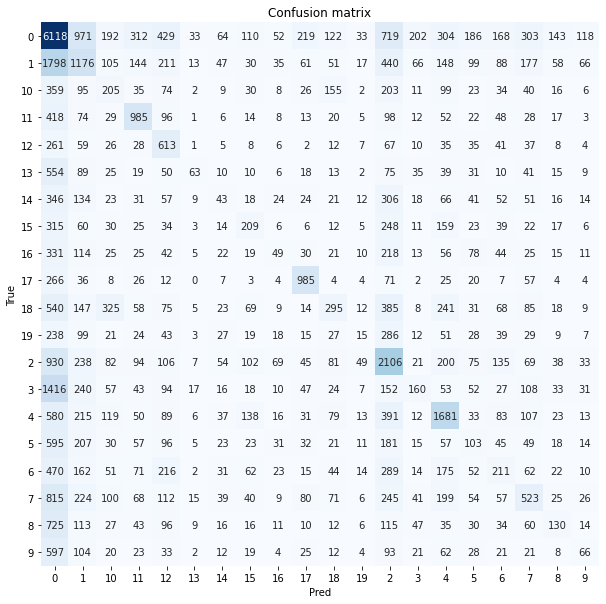

In [9]:
#+
confusion_matrix(test_tweets['emoji'], predicted, predicted_prob)

In [10]:
#+
#applying official evaluation script
evaluation.main(test_tweets["emoji"], predicted)

Macro F-Score (official): 21.846
-----
Micro F-Score: 31.472
Precision: 31.472
Recall: 31.472
